In [6]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
primary_date = datetime.date(2020, 7, 13)
if (datetime.date.today() > primary_date):
    print("It's already after the primary. Why are you running this?")
    
# import data
df = pd.read_excel("Roster.xlsx", index_col="Candidate")

In [12]:
# Calculate date range
start_date = datetime.date(2019, 6, 15)
day_delta = (datetime.date.today() - start_date).days
print("{0} days have elapsed since the start of the draft (June 15, 2019)".format(day_delta))

primary_delta = (primary_date - datetime.date.today()).days
print("{0} days until the start of the Democratic Convention (July 13, 2020)".format(primary_delta))


213 days have elapsed since the start of the draft (June 15, 2019)
181 days until the start of the Democratic Convention (July 13, 2020)


In [13]:
# Calculate point totals
# Total number of points on a per day basis for a candidate that has not dropped
ideal_points = np.array(range(day_delta))+1
drafter_points = {} # dictionary to hold point totals

for (candidate, drafter) in zip(df.index, df["Drafter"]):
    drop_date = df.at[candidate,"Date Dropped"]
    if(drop_date=="-"):
        drafter_points[drafter] = drafter_points.get(drafter, np.zeros(day_delta)) + ideal_points
    else:
        time_in_race = (drop_date.date() - start_date).days
        temp_points = ideal_points.copy()
        temp_points[-1:time_in_race-1:-1] = time_in_race
        drafter_points[drafter] = drafter_points.get(drafter, np.zeros(day_delta)) + temp_points

# Sort in total accumulated point order
drafter_points = {k: v for k, v in sorted(drafter_points.items(), key=lambda e: e[1][-1], reverse=True)}
for drafter in drafter_points:
    print("{0} has {1} points".format(drafter, int(drafter_points[drafter][-1])))

Daniel has 724 points
Michael has 670 points
Sara has 654 points
Kevin M has 534 points
Jeff has 495 points
Kevin K has 493 points


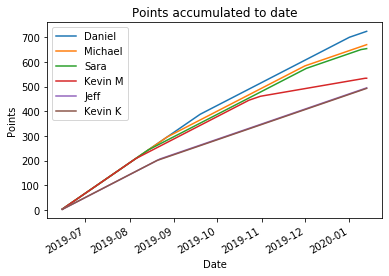

In [14]:
dates = [start_date + datetime.timedelta(days=i) for i in range(day_delta)]
for drafter in drafter_points:
    plt.plot(dates, drafter_points[drafter]);

plt.gcf().autofmt_xdate();
plt.title("Points accumulated to date");
plt.xlabel("Date");
plt.ylabel("Points");
plt.legend(drafter_points.keys());
# plt.figure(figsize=(18, 16), dpi=300);
plt.savefig("figs/point_total_{}".format(datetime.date.today()))